In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,HuberRegressor,RANSACRegressor,TheilSenRegressor
from sklearn.ensemble import RandomForestRegressor,HistGradientBoostingRegressor,AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import neighbors
from xgboost import XGBRegressor

In [2]:
#df = pd.read_csv('tipp_rsrp.csv')
#df = df.fillna(0)
#print(df)

In [3]:
df1 = pd.read_csv('Simulation_ACRE_ML_Carrier_1900MHz_LiDAR_IN_DSM_2019_BS1.csv')
df2 = pd.read_csv('Simulation_ACRE_ML_Carrier_1900MHz_LiDAR_IN_DSM_2019_BS2.csv')
df3 = pd.read_csv('Simulation_ACRE_ML_Carrier_1900MHz_LiDAR_IN_DSM_2019_BS3.csv')
df4 = pd.read_csv('Simulation_ACRE_ML_Carrier_1940MHz_LiDAR_IN_DSM_2019_BS1.csv')
df5 = pd.read_csv('Simulation_ACRE_ML_Carrier_1940MHz_LiDAR_IN_DSM_2019_BS2.csv')
df6 = pd.read_csv('Simulation_ACRE_ML_Carrier_1940MHz_LiDAR_IN_DSM_2019_BS3.csv')
df7 = pd.read_csv('Simulation_ACRE_ML_Carrier_1957.5MHz_LiDAR_IN_DSM_2019_BS1.csv')
df8 = pd.read_csv('Simulation_ACRE_ML_Carrier_1957.5MHz_LiDAR_IN_DSM_2019_BS2.csv')
df9 = pd.read_csv('Simulation_ACRE_ML_Carrier_1957.5MHz_LiDAR_IN_DSM_2019_BS3.csv')
df10 = pd.read_csv('Simulation_ACRE_ML_Carrier_1970MHz_LiDAR_IN_DSM_2019_BS1.csv')
df11 = pd.read_csv('Simulation_ACRE_ML_Carrier_1970MHz_LiDAR_IN_DSM_2019_BS2.csv')
df12 = pd.read_csv('Simulation_ACRE_ML_Carrier_1970MHz_LiDAR_IN_DSM_2019_BS3.csv')
df13 = pd.read_csv('Simulation_ACRE_ML_Carrier_1977.5MHz_LiDAR_IN_DSM_2019_BS1.csv')
df14 = pd.read_csv('Simulation_ACRE_ML_Carrier_1990MHz_LiDAR_IN_DSM_2019_BS2.csv')
df15 = pd.read_csv('Simulation_ACRE_ML_Carrier_2115.1MHz_LiDAR_IN_DSM_2019_BS1.csv')
df16 = pd.read_csv('Simulation_ACRE_ML_Carrier_2115.1MHz_LiDAR_IN_DSM_2019_BS2.csv')


#df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16], ignore_index=True, sort=False)
df = pd.concat([df1,df4,df7,df10,df13,df15], ignore_index=True, sort=False)

df = df.sample(frac = 1)

print(df)

          Pathloss  CenterFreq  NearestBSDist  ClutterHeight  \
213197 -127.475247      1970.0    1130.803485       7.641497   
18573  -126.630622      1900.0    1491.320080       9.298457   
156448 -123.047520      1957.5    1036.463051       8.114455   
117679 -132.923118      1940.0    2218.356382      20.416947   
328072 -106.537017      2115.1     544.226395       8.230281   
...            ...         ...            ...            ...   
250219 -134.586552      1970.0    2332.277460       9.228033   
141053 -117.248174      1957.5     768.774237      19.676773   
194869 -145.229414      1957.5    2825.106838      -8.006190   
268730 -124.832680      1977.5    1389.179547       8.090612   
325678 -137.035148      1977.5    2852.844937      -8.764566   

        TerrainRoughness    BSHeight      TxHAAT     Alpha  
213197          3.566173   98.367743   90.726246  0.080232  
18573           8.330209   98.843240   89.544783  0.060044  
156448          3.413775   97.407633   89.293178

In [4]:
df1 = pd.read_csv('Simulation_LindbergVillage_ML_Carrier_731.5MHz_LiDAR_IN_DSM_2019_BS1.csv')
df2 = pd.read_csv('Simulation_LindbergVillage_ML_Carrier_742.5MHz_LiDAR_IN_DSM_2019_BS1.csv')
df3 = pd.read_csv('Simulation_LindbergVillage_ML_Carrier_763MHz_LiDAR_IN_DSM_2019_BS1.csv')
df4 = pd.read_csv('Simulation_LindbergVillage_ML_Carrier_1955MHz_LiDAR_IN_DSM_2019_BS1.csv')
df5 = pd.read_csv('Simulation_LindbergVillage_ML_Carrier_1970.1MHz_LiDAR_IN_DSM_2019_BS1.csv')
df6 = pd.read_csv('Simulation_LindbergVillage_ML_Carrier_1982.5MHz_LiDAR_IN_DSM_2019_BS1.csv')
df7 = pd.read_csv('Simulation_LindbergVillage_ML_Carrier_1985MHz_LiDAR_IN_DSM_2019_BS1.csv')
df8 = pd.read_csv('Simulation_LindbergVillage_ML_Carrier_2115MHz_LiDAR_IN_DSM_2019_BS1.csv')
df9 = pd.read_csv('Simulation_LindbergVillage_ML_Carrier_2125MHz_LiDAR_IN_DSM_2019_BS1.csv')
df10 = pd.read_csv('Simulation_LindbergVillage_ML_Carrier_2132.5MHz_LiDAR_IN_DSM_2019_BS1.csv')
df11 = pd.read_csv('Simulation_LindbergVillage_ML_Carrier_2140MHz_LiDAR_IN_DSM_2019_BS1.csv')
df12 = pd.read_csv('Simulation_LindbergVillage_ML_Carrier_2157.5MHz_LiDAR_IN_DSM_2019_BS1.csv')
df13 = pd.read_csv('Simulation_LindbergVillage_ML_Carrier_2160MHz_LiDAR_IN_DSM_2019_BS1.csv')
df14 = pd.read_csv('Simulation_LindbergVillage_ML_Carrier_2167.5MHz_LiDAR_IN_DSM_2019_BS1.csv')
df15 = pd.read_csv('Simulation_LindbergVillage_ML_Carrier_2355MHz_LiDAR_IN_DSM_2019_BS1.csv')
df16 = pd.read_csv('Simulation_LindbergVillage_ML_Carrier_2506MHz_LiDAR_IN_DSM_2019_BS1.csv')
df17 = pd.read_csv('Simulation_LindbergVillage_ML_Carrier_2525.8MHz_LiDAR_IN_DSM_2019_BS1.csv')
df18 = pd.read_csv('Simulation_LindbergVillage_ML_Carrier_2538.2MHz_LiDAR_IN_DSM_2019_BS1.csv')


df6 = pd.read_csv('Simulation_ACRE_ML_Carrier_1940MHz_LiDAR_IN_DSM_2019_BS3.csv')


df2 = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18], ignore_index=True, sort=False)
#df2 = pd.concat([df1], ignore_index=True, sort=False)

df2 = df2.sample(frac = 1)

print(df2)

           Pathloss  CenterFreq  NearestBSDist  ClutterHeight  \
779554   -89.194411      2160.0     191.061722      -1.629320   
20501    -85.464961       731.5     300.171462      -0.750495   
939879  -124.387047      2506.0     880.128715      -1.632192   
259758  -108.315110      1970.1     575.674068      -2.905341   
526090  -109.464860      2125.0     613.560301      -4.289616   
...             ...         ...            ...            ...   
780486   -98.049932      2160.0     352.792936      -1.264967   
640185   -97.567132      2140.0     329.647449      -1.494924   
23055    -98.106276       731.5     552.895607      -4.144673   
868278  -123.372862      2355.0     894.613358      -0.486409   
1032506  -86.605192      2525.8     129.752593       1.133622   

         TerrainRoughness   BSHeight     TxHAAT     Alpha  
779554           3.773420  55.835941  57.465261  0.300768  
20501            3.102872  55.973092  56.723587  0.188971  
939879           4.507989  56.363223  5

In [5]:
#set the input features
X_train = df[["CenterFreq", "NearestBSDist",'ClutterHeight','TerrainRoughness','BSHeight','TxHAAT','Alpha']]
#X_train = df[["CenterFreq",'TerrainRoughness','TxHAAT','Alpha']]
#X_train = df[["NearestBSDist",'BSHeight','Alpha']]

#set the target variable
y_train = df[['Pathloss']]
#Y = df2[['rsrp']]
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

X_test = df2[["CenterFreq", "NearestBSDist",'ClutterHeight','TerrainRoughness','BSHeight','TxHAAT','Alpha']]
#X_test = df3[["CenterFreq",'TerrainRoughness','TxHAAT','Alpha']]
#X_test = df2[["NearestBSDist",'BSHeight','Alpha']]

#X_test = df_2[["CenterFreq", "NearestBSDist",'ClutterHeight','TerrainRoughness','BSHeight','TxHAAT','Alpha']]

#y_test = df_2[['Pathloss']]
y_test = df2[['Pathloss']]

In [6]:
print(y_train)

          Pathloss
213197 -127.475247
18573  -126.630622
156448 -123.047520
117679 -132.923118
328072 -106.537017
...            ...
250219 -134.586552
141053 -117.248174
194869 -145.229414
268730 -124.832680
325678 -137.035148

[391680 rows x 1 columns]


In [7]:
#rgr = RandomForestRegressor(n_estimators=100)
#rgr = MLPRegressor(random_state=1, max_iter=500,hidden_layer_sizes=[5, 5])
#rgr = MLPRegressor(random_state=1, max_iter=500)
rgr = AdaBoostRegressor(n_estimators=300)
#rgr = XGBRegressor(n_estimators=800, max_depth=4,learning_rate = 0.01)

rgr_base = rgr.fit(X_train, y_train)

MSEs = cross_val_score(estimator=rgr_base,
                         X=X_train,
                         y=y_train.values.ravel(),
                         scoring='neg_mean_absolute_error',  #neg_mean_squared_error
                         cv=5)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
import pickle
with open('rfc_model_acre_sim_lindberg_sim_pkl', 'wb') as files:
    pickle.dump(rgr_base, files)

In [9]:
y_test = (np.concatenate(y_test.to_numpy()))
print(y_test)

[ -89.19441122  -85.46496105 -124.38704675 ...  -98.10627649 -123.3728624
  -86.60519165]


In [10]:
# load saved model
with open('rfc_model_acre_sim_lindberg_sim_pkl' , 'rb') as f:
    rfc_pretrained = pickle.load(f)

In [11]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

y_pred_rgr =  rfc_pretrained.predict(X_test)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred_rgr) #default=True
print("MLP MAE:",mae)


MLP MAE: 4.438616426551222


In [ ]:
#train using df1        
        
        
    MAE: 12.105041160265763       #random forest train using df1 and test on df1
    MAE: 11.236839269121733       #adaboost train using df1 and test on df1 
    MAE: 10.254806756340612       #adaboost train using df1 and test on df2
    MAE: 10.251592401145327       #adaboost train using df1 and test on df3
    MAE: 2.202777727035719        #adaboost train using df1 and test on df4
    MAE: 2.2426098800182466        #adaboost train using df1 and test on df5
    MAE: 12.819806973437624        #adaboost train using df1 and test on df6
    MAE: 2.3537642433695907        #adaboost train using df1 and test on df7
    MAE: 2.148888377253629        #adaboost train using df1 and test on df8
    MAE: 3.710845514796517        #adaboost train using df1 and test on df9
    MAE: 2.201185577929213        #adaboost train using df1 and test on df10
    MAE: 2.2618255521534567        #adaboost train using df1 and test on df11
    MAE: 2.168377997876483        #adaboost train using df1 and test on df12
    MAE: 2.1834513370627255        #adaboost train using df1 and test on df13
    MAE: 2.1584167929228184        #adaboost train using df1 and test on df14
    MAE: 2.530155274826558        #adaboost train using df1 and test on df15
    MAE: 2.9330257653994396        #adaboost train using df1 and test on df16
    MAE: 2.5586545803756655        #adaboost train using df1 and test on df17
    MAE: 3.6117839920919037        #adaboost train using df1 and test on df18


In [ ]:
#train using df2        
        
        
    MAE: 42.10495219575433       #random forest train using df2 and test on df1
    MAE: 39.294999460732924       #adaboost train using df2 and test on df1 
    MAE: 38.192367812616006       #adaboost train using df2 and test on df2
    MAE: 37.846747723715076       #adaboost train using df2 and test on df3
    MAE: 28.297387478946487       #adaboost train using df2 and test on df4
    MAE: 27.63185573863704       #adaboost train using df2 and test on df5
    MAE: 7.838966234558394       #adaboost train using df2 and test on df6
    MAE: 27.992142334627022       #adaboost train using df2 and test on df7
    MAE: 27.215730735288957       #adaboost train using df2 and test on df8
    MAE: 27.859435719447358       #adaboost train using df2 and test on df9
    MAE: 27.966568496750636       #adaboost train using df2 and test on df10
    MAE: 27.761905094323154       #adaboost train using df2 and test on df11
    MAE: 27.221260077227495       #adaboost train using df2 and test on df12 
    MAE: 27.262196387600543       #adaboost train using df2 and test on df13 
    MAE: 26.90421360376092       #adaboost train using df2 and test on df14 
    MAE: 26.376156767887558       #adaboost train using df2 and test on df15 
    MAE: 26.26814973235254       #adaboost train using df2 and test on df16 
    MAE: 25.82502257101187       #adaboost train using df2 and test on df17 
    MAE: 25.771087817337886       #adaboost train using df2 and test on df18 


In [ ]:
1-  MAE: 12.752008425245098       #random forest
    MAE: 11.995521063547509       #XGBRegressor
    MAE: 12.618320159313724       #random forest using only 


In [ ]:
#Lindberg
MLP MAE: 11.700728126919422   #trained using mlp with acre s21 and test on Lindberg S20 using all features
MLP MAE: 10.562148189247978   #trained using mlp with acre s21&lyca and test on Lindberg S20 using all features
MLP MAE: 9.94587022794955     ##trained using mlp with acre s21&lyca and test on Lindberg data without NearestBSDist

    
    
## HAppy Hallow  
MLP MAE: 10.273045467291281    #trained using acre and lindberg test on happyhallow S21
MLP MAE: 12.308433640735375   ##trained using acre and test on happyhallow S21
MLP MAE: 12.210449523849032   ##trained using acre and lindberg test on happyhallow S20
MLP MAE: 14.742723081822623   ##trained using acre and test on happyhallow S20
MLP MAE: 11.432101893688143    ###trained using acre and lindberg test on happyhallow S21&S20
MLP MAE: 11.72345029864112     ###trained using acre and lindberg test on happyhallow S21&S20&s8
    
    
    
#ACRE    
MLP MAE: 11.406047150876194   ##trained using mlp with lindberg s20 and test on acre Lyca using all features
MLP MAE: 26.45044081941631    ###trained using mlp with lindberg &happy hallow and test on acre data using all features

MLP MAE: 20.974374954382135   ###trained using mlp with lin and test on acre data using all features
                              #but with no clutter height

MLP MAE: 12.512276762623541   ###trained using mlp with lindberg &happy hallow and test on acre data using all features
                              #but with no NearestBSDist and clutter height
        
        

MLP MAE: 9.720395049068836    ##trained using mlp with lindberg s20 and test on acre S21 only on 1000 data using all features
     

        
MLP MAE: 21.122592515963127   #no alpha



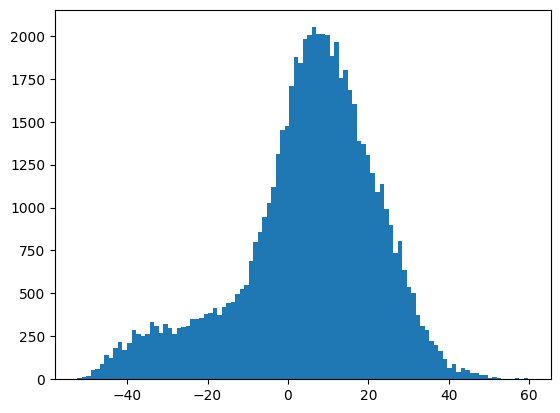

In [16]:
plt.hist(y_pred_rgr-y_test,bins=100)
plt.show()

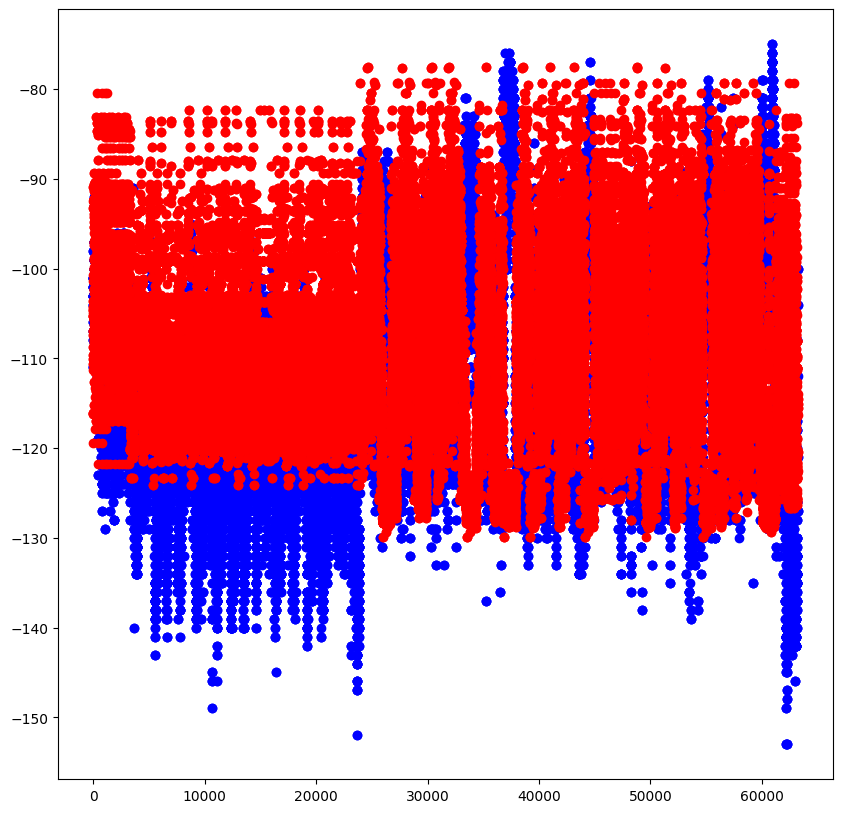

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(y_pred_rgr)), y_pred_rgr, color='red')


Text(0, 0.5, 'Predictions')

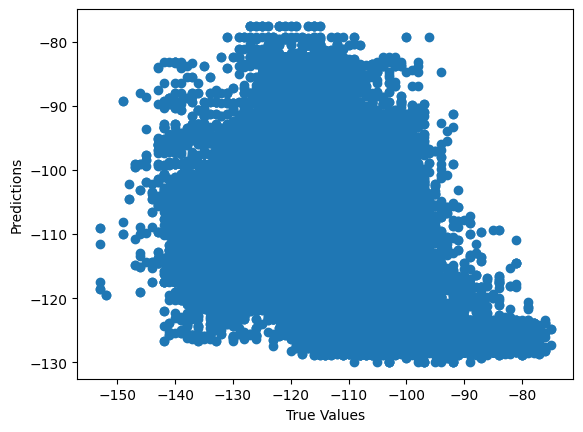

In [18]:
g=plt.scatter(y_test, y_pred_rgr)
g.axes.set_xlabel('True Values')
g.axes.set_ylabel('Predictions')